## Assignment 2 - Millie McCallum
### Student ID: 220015902
#### GitHub link: https://github.com/milliemcc/Lab_assignment2?tab=readme-ov-file#lab_assignment2
#### Part 5: Python Rasterrio

#### Install relevant packages

In [1]:
pip install earthpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 28.5 MB/s eta 0:00:00


In [2]:
pip install rasterio

In [3]:
pip install contextily

In [4]:
pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 1.8 MB/s eta 0:00:00


In [5]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#import the packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import contextily as ctx
import rasterio as rio
from rasterio import plot
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

plt.rcParams['figure.figsize'] = [10, 8]

#### Task 1: Read the file as a rasterio dataset

In [7]:
data = rio.open('/content/drive/MyDrive/Colab Notebooks/data/Assessment2_data/Assignment 2 Data/elev.tif')
#read the tiff file using rio.open

#### Task 2: What is the CRS of the dataset?

In [ ]:
print(data.crs) #

EPSG:32617


#### Task 3:  Describe the raster dataset regarding the raster extent (bounds), the reference system, and how many bands are in this dataset.

In [ ]:
print(data.bounds) #the raster extent
print(data.crs) #the coordinate reference system used
print(data.count) #the number of bands (1)

BoundingBox(left=479753.39945587853, bottom=4170823.2037591375, right=668843.3994558785, top=4347733.203759138)
EPSG:32617
1


#### Task 4: Create a plot/map of the raster dataset.

In [10]:
data_arr = data.read(1) #create an array of the raster so it can be read
data_arr

array([[-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       ...,
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768]], dtype=int16)

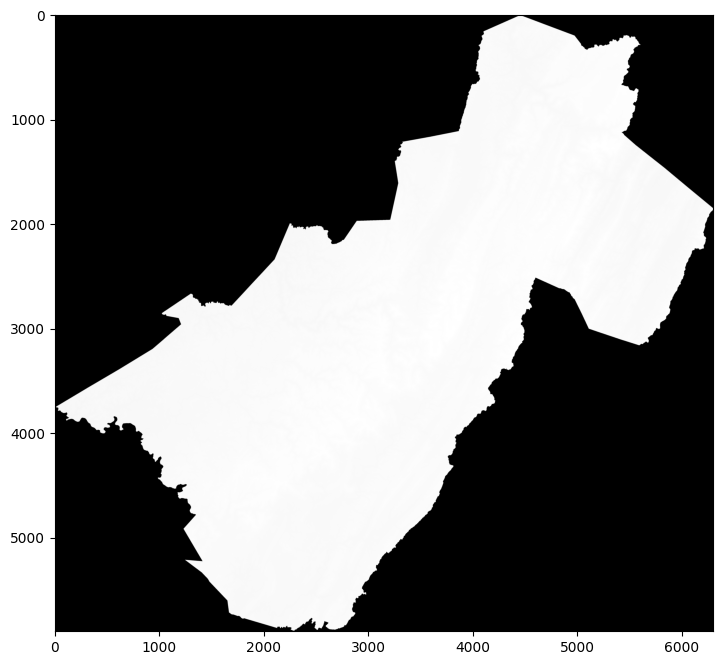

In [ ]:
image_read_masked = np.ma.masked_array(data_arr, mask=(data_arr == 0)) #read the array
plt.rcParams['figure.figsize'] = [10,8] #set the parameters
plt.imshow(image_read_masked, cmap="gist_gray") #plot the image

#### Task 5: Create Histograms from the raster

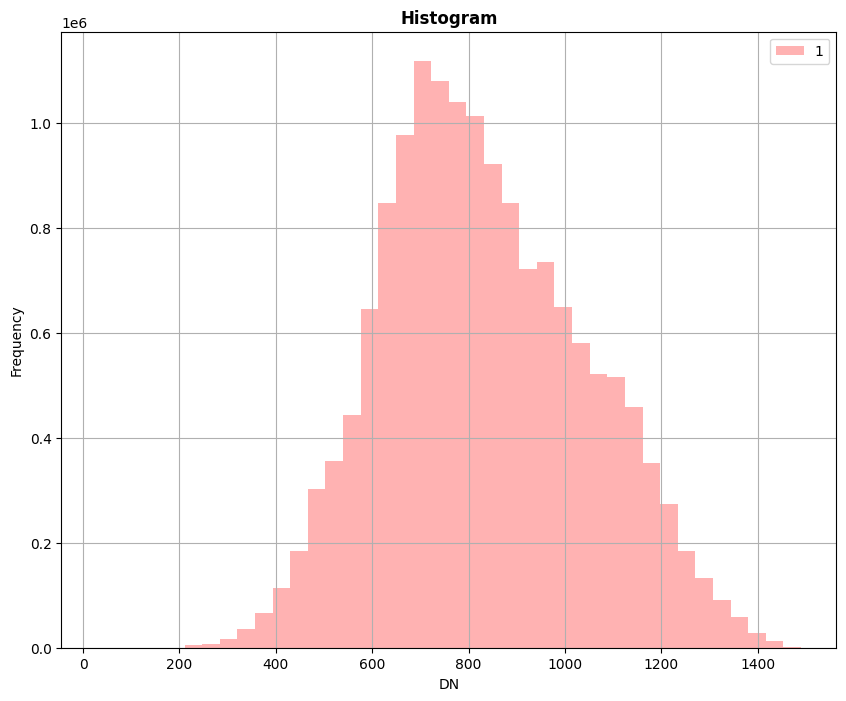

In [12]:
from rasterio.plot import show_hist
#import the relevant packages

#plot the histogram with the following parameters. In this instance bins=40 which means that there are 40 categories
show_hist(data, bins=40, lw=0,
stacked=False, alpha=0.3,
          histtype='stepfilled', title="Histogram")

#here there does not appear to be any outliers. If there were to be outliers I would mask the outliers to filter the relevant outliers out
#there is also only one band in the plot so only one histogram is relevant

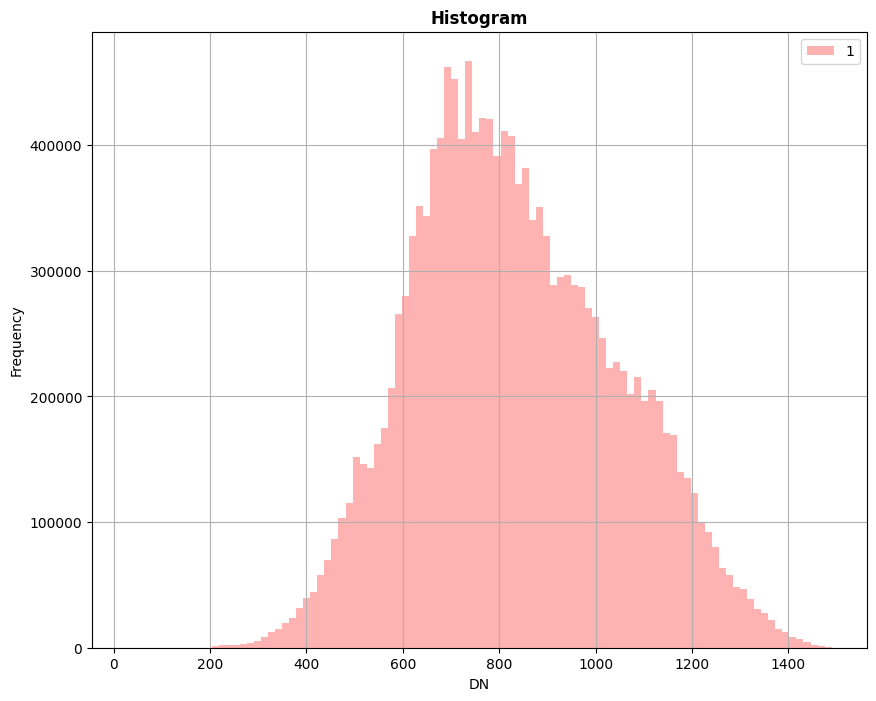

In [14]:
show_hist(data, bins=100, lw=0,
stacked=False, alpha=0.3,
          histtype='stepfilled', title="Histogram")

#to show further detail and variation in the dataset, bins=100 to show more bars